In [1]:
# R studio
# import a package
# install.packages("fpp3")
# type 
# library("fpp3") 
# and execute
# type
# algeria_economy <- global_economy %>%        where %>% is a pipe, it passes result of one command to concurrent one
#     filter(Country=="Algeria") %>%
#     algeria_economy %>%

#     autoplot(Exports) + labs(y="% GDP ", title="Exports: Algeria")      labs stands for labels

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
# set frequency
df.index.freq='MS'

In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

<AxesSubplot:xlabel='Month'>

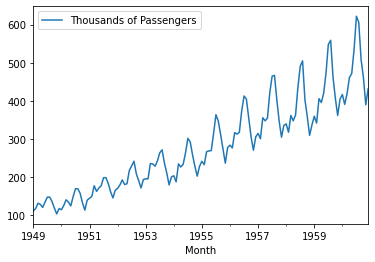

In [7]:
df.plot()

In [8]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [10]:
df = pd.read_csv('AlgerianExport.csv')

<AxesSubplot:>

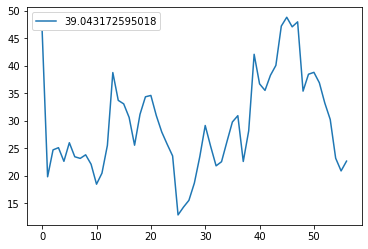

In [11]:
df.plot()

In [13]:
draw = pd.read_csv('AlgerianExport.csv', header=None)

In [14]:
index = pd.date_range(start="1960", end="2018", freq="Y") #date range is 1960-2017 but we typed 2018 because last date is excluded

In [15]:
index

DatetimeIndex(['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31',
               '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31',
               '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31',
               '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31',
               '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31',
               '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
      

<AxesSubplot:>

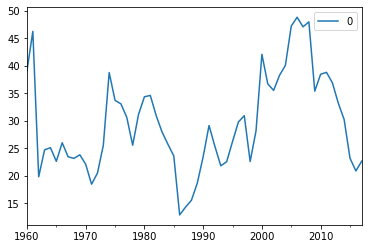

In [16]:
df = draw.set_index(index)
df.plot()

In [17]:
fit1 = SimpleExpSmoothing(df, initialization_method="heuristic").fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

In [18]:
fit2 = SimpleExpSmoothing(df, initialization_method="heuristic").fit(smoothing_level=0.6, optimized=False)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

In [19]:
fit3 = SimpleExpSmoothing(df, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$")
fit3.model.params["smoothing_level"]

0.8397833654862842

In [20]:
import matplotlib.pyplot as plt

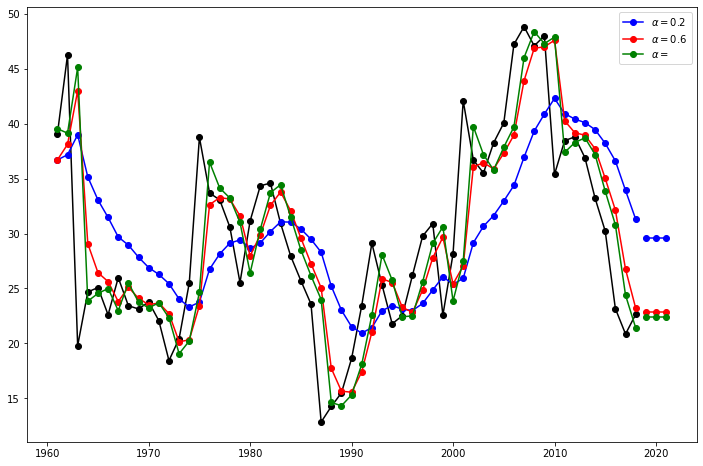

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1, )=plt.plot(fcast1, marker="o", color="blue")

plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2, )=plt.plot(fcast2, marker="o", color="red")

plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3, )=plt.plot(fcast3, marker="o", color="green")

plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [26]:
df.columns = ['Export']

In [27]:
df.to_pickle("AlgerianExport.pkl")